In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
cell_df = pd.read_csv("clevBinary.csv")
cell_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
feature_df = cell_df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
X = np.asarray(feature_df)
X[0:5]

array([[ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
          2.3,   3. ,   0. ,   6. ],
       [ 67. ,   1. ,   4. , 160. , 286. ,   0. ,   2. , 108. ,   1. ,
          1.5,   2. ,   3. ,   3. ],
       [ 67. ,   1. ,   4. , 120. , 229. ,   0. ,   2. , 129. ,   1. ,
          2.6,   2. ,   2. ,   7. ],
       [ 37. ,   1. ,   3. , 130. , 250. ,   0. ,   0. , 187. ,   0. ,
          3.5,   3. ,   0. ,   3. ],
       [ 41. ,   0. ,   2. , 130. , 204. ,   0. ,   2. , 172. ,   0. ,
          1.4,   1. ,   0. ,   3. ]])

In [4]:
cell_df['num'] = cell_df['num'].astype('int')
y = np.asarray(cell_df['num'])
y [0:5]

array([0, 1, 1, 0, 0])

In [5]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.93618065,  0.69109474, -2.24062879,  0.75038004, -0.27644339,
         2.43042728,  1.01019851,  0.01749443, -0.69641941,  1.06896529,
         2.26414539, -0.72197605,  0.65587737],
       [ 1.3789285 ,  0.69109474,  0.87388018,  1.59626645,  0.74455507,
        -0.41145029,  1.01019851, -1.81633388,  1.43591632,  0.38177332,
         0.6437811 ,  2.47842525, -0.89422007],
       [ 1.3789285 ,  0.69109474,  0.87388018, -0.65943064, -0.35349988,
        -0.41145029,  1.01019851, -0.89941972,  1.43591632,  1.32666228,
         0.6437811 ,  1.41162482,  1.17257652],
       [-1.94168041,  0.69109474, -0.16428947, -0.09550637,  0.05104668,
        -0.41145029, -1.00341866,  1.63300986, -0.69641941,  2.09975324,
         2.26414539, -0.72197605, -0.89422007],
       [-1.49893255, -1.44697961, -1.20245913, -0.09550637, -0.83510292,
        -0.41145029,  1.01019851,  0.97807117, -0.69641941,  0.29587432,
        -0.97658319, -0.72197605, -0.89422007]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (237, 13) (237,)
Test set: (60, 13) (60,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [25]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new LR model
lr_cv = LR
#train model with cv of 5 
cv_scores = cross_val_score(lr_cv, X, y, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


[0.83 0.83 0.8  0.97 0.8  0.77 0.8  0.9  0.76 0.86]
cv_scores mean:0.8317241379310346


In [9]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [10]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.40381628, 0.59618372],
       [0.548051  , 0.451949  ],
       [0.54684977, 0.45315023],
       [0.15954023, 0.84045977],
       [0.75920753, 0.24079247],
       [0.43877198, 0.56122802],
       [0.29024352, 0.70975648],
       [0.69693724, 0.30306276],
       [0.65438408, 0.34561592],
       [0.42340253, 0.57659747],
       [0.32948168, 0.67051832],
       [0.63892102, 0.36107898],
       [0.35296234, 0.64703766],
       [0.74107836, 0.25892164],
       [0.75261689, 0.24738311],
       [0.66323872, 0.33676128],
       [0.74140685, 0.25859315],
       [0.7432501 , 0.2567499 ],
       [0.38485736, 0.61514264],
       [0.22537683, 0.77462317],
       [0.2707786 , 0.7292214 ],
       [0.47316694, 0.52683306],
       [0.1655659 , 0.8344341 ],
       [0.39741439, 0.60258561],
       [0.67091115, 0.32908885],
       [0.56446054, 0.43553946],
       [0.17881931, 0.82118069],
       [0.20373177, 0.79626823],
       [0.77886395, 0.22113605],
       [0.6860612 , 0.3139388 ],
       [0.

In [11]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.7575757575757576

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[0,1]))

[[27  4]
 [ 4 25]]


Confusion matrix, without normalization
[[27  4]
 [ 4 25]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        31
           1       0.86      0.86      0.86        29

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



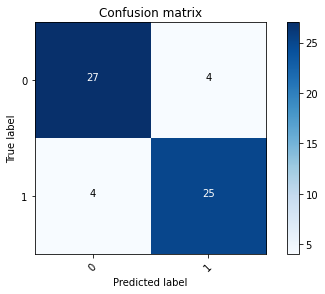

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))


In [14]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='binary', pos_label=1) 

0.8620689655172413

In [17]:
from sklearn import metrics
from sklearn.metrics import auc


fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat, pos_label=1)
roc_auc = auc(fpr, tpr)

Text(0.5, 1.0, 'ROC Curve of Stacked')

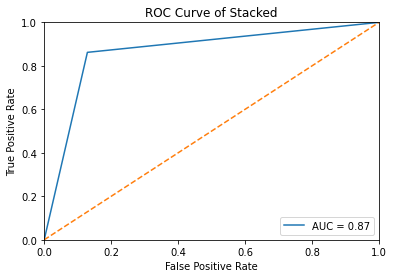

In [18]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], linestyle= '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Stacked')

In [19]:
yhat_prob = LR.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat_prob[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

Text(0.5, 1.0, 'ROC Curve of LR')

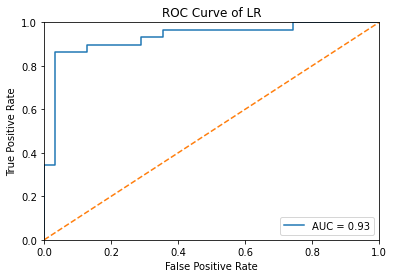

In [20]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], linestyle= '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LR')

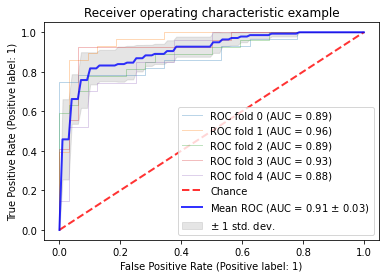

In [21]:
import matplotlib.pyplot as plt


from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = LR
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

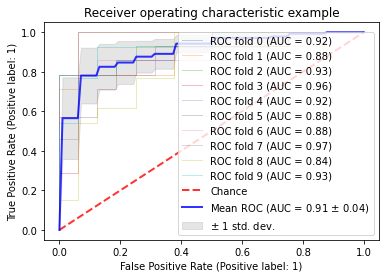

In [22]:
import matplotlib.pyplot as plt


from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = LR
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [23]:
import matplotlib.pyplot as plot
import numpy as num
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
#heart = X
data = X
target = y
classnames = ['No(0)','Yes(1)']
classnames
labels, counts = num.unique(target, return_counts=True)
print(data)
def evaluate_model(data_x, data_y):
    k_fold = KFold(10, shuffle=True, random_state=1)

    predicted_targets = num.array([])
    actual_targets = num.array([])

    for train_ix, test_ix in k_fold.split(data_x):
        train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]

        classifiers = LR.fit(train_x, train_y)
        predicted_labels = classifiers.predict(test_x)

        predicted_targets = num.append(predicted_targets, predicted_labels)
        actual_targets = num.append(actual_targets, test_y)

    return predicted_targets, actual_targets
  

[[ 0.94  0.69 -2.24 ...  2.26 -0.72  0.66]
 [ 1.38  0.69  0.87 ...  0.64  2.48 -0.89]
 [ 1.38  0.69  0.87 ...  0.64  1.41  1.17]
 ...
 [ 1.49  0.69  0.87 ...  0.64  1.41  1.17]
 [ 0.27  0.69  0.87 ...  0.64  0.34  1.17]
 [ 0.27 -1.45 -1.2  ...  0.64  0.34 -0.89]]


              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       160
         1.0       0.84      0.80      0.82       137

    accuracy                           0.84       297
   macro avg       0.84      0.83      0.83       297
weighted avg       0.84      0.84      0.83       297

Confusion matrix, without normalization


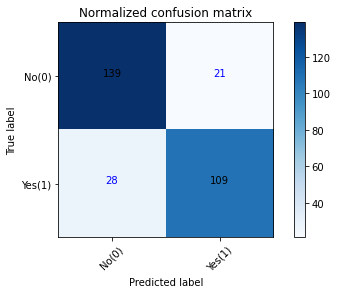

In [24]:
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list, labels=[0,1])
    num.set_printoptions(precision=2)
    print (classification_report(actual_target, predicted_target))

   
    plot.figure()
    generate_confusion_matrix(cnf_matrix, classes=['No(0)','Yes(1)'], normalize=False, title='Normalized confusion matrix')
    plot.show()
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, num.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plot.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plot.title(title)
    plot.colorbar()

    tick_marks = np.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plot.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="black" if cnf_matrix[i, j] > thresh else "blue")

    plot.tight_layout()
    plot.ylabel('True label')
    plot.xlabel('Predicted label')

    return cnf_matrix
predicted_target, actual_target = evaluate_model(data, target)
plot_confusion_matrix(predicted_target, actual_target)